# Data Analysis Tools

### Contents

1. <a href='#pandas'>Dataframes from Pandas</a>
2. <a href='#bokeh'>Plotting with Bokeh</a>

<a id='pandas'></a>
## 1. Dataframes from Pandas

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np

### Import and complete data

We define get_data to retrieve the data from a csv file.
We add the collumns we need:
- price_delta is the variation during next candle (the one to guess)
- price_delta_percent in the variation in %

In [2]:



FILE_PATH = 'data/csv_files/btc_eur_3600.csv'
def get_data():
    df = pd.read_csv('{}'.format(FILE_PATH), index_col='timestamp')
    
    df['price_delta'] = df['closing_price'].shift(-1) - df['closing_price']
    df['price_delta_percent'] = df['price_delta'] / df['closing_price'] * 100
    
    df['macd_delta'] = df['macd'] - df['macd'].shift(1)
    df['date'] = df['date'].apply(lambda x: parse(x))
    return df

### Study data

In [3]:
df_primary = get_data()
df_primary.head()

,date,length,low_price,high_price,opening_price,closing_price,volume,bdb_low,bdb_high,mme12,mme26,stochastic,macd,price_delta,price_delta_percent,macd_delta
timestamp,,,,,,,,,,,,,,,,
1504314000,2017-09-02 01:00:00+00:00,3600,4172.50,4185.00,4172.75,4185.00,9.827998,4057.037771,4147.382229,3587.767049,3553.102534,1.000000,34.664515,-31.96,-0.763680,NaN
1504317600,2017-09-02 02:00:00+00:00,3600,4145.00,4185.00,4185.00,4153.04,15.091203,4067.629643,4150.748357,3590.182985,3557.146522,0.201000,33.036463,-77.02,-1.854545,-1.628052
1504321200,2017-09-02 03:00:00+00:00,3600,4076.02,4163.37,4154.73,4076.02,31.744749,4075.525587,4148.814413,3580.237035,3555.235086,0.000000,25.001948,17.99,0.441362,-8.034515
1504324800,2017-09-02 04:00:00+00:00,3600,4072.02,4106.23,4079.73,4094.01,14.755165,4078.846265,4148.822735,3574.340891,3554.759562,0.642795,19.581328,-180.03,-4.397400,-5.420620
1504328400,2017-09-02 05:00:00+00:00,3600,3850.18,4094.02,4094.01,3913.98,185.642850,4050.981341,4161.446659,3541.708655,3541.017359,0.261647,0.691296,135.01,3.449430,-18.890033


In [4]:
df_primary.describe()

,length,low_price,high_price,opening_price,closing_price,volume,bdb_low,bdb_high,mme12,mme26,stochastic,macd,price_delta,price_delta_percent,macd_delta
count,5770.0,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5769.000000,5769.000000,5769.000000
mean,3600.0,7453.774497,7587.195239,7524.445381,7525.195894,149.780173,7371.023765,7667.658946,6511.795227,6501.159152,0.543965,10.636075,0.601922,0.020685,-0.007064
std,0.0,3111.862010,3193.231373,3155.996650,3155.854271,189.130766,3071.520910,3237.073915,2729.445035,2724.131543,0.337499,102.215673,128.374424,1.432415,15.301790
min,3600.0,2467.290000,2567.420000,2525.020000,2525.060000,0.000000,2609.648916,2868.479118,2284.559901,2366.072285,0.000000,-627.335635,-1577.490000,-13.260362,-138.764422
25%,3600.0,5275.557500,5345.580000,5300.032500,5303.347500,50.210311,5162.323507,5424.128972,4588.733598,4586.732290,0.238214,-28.087233,-34.500000,-0.504311,-5.153553
50%,3600.0,6900.000000,6990.795000,6944.510000,6945.740000,95.637621,6824.827278,7041.380431,6007.608629,6008.572543,0.569098,11.019466,1.690000,0.026678,-0.093557
75%,3600.0,8984.075000,9126.462500,9053.597500,9053.877500,176.376488,8869.801856,9201.658822,7833.226545,7807.935853,0.859573,53.184515,36.790000,0.543105,5.202290
max,3600.0,16840.000000,16979.000000,16928.210000,16928.210000,3035.870469,16425.610351,16841.567124,14491.187727,14382.538220,1.000000,617.085691,1270.190000,14.903026,153.781280


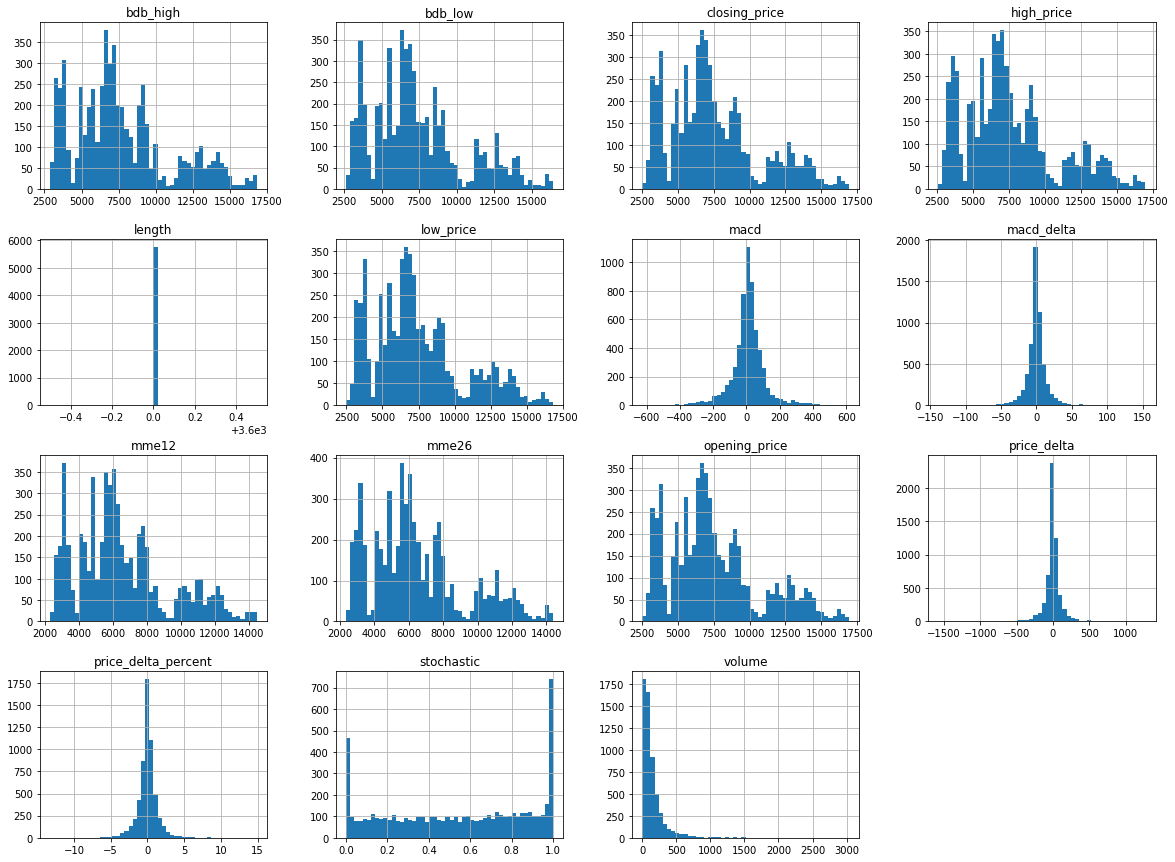

In [5]:
df_primary.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
corr_matrix = df_primary.corr()
corr_matrix['price_delta'].sort_values(ascending=False)

price_delta            1.000000
price_delta_percent    0.928591
volume                 0.058011
macd                  -0.002919
stochastic            -0.007041
bdb_high              -0.016083
mme26                 -0.017916
mme12                 -0.017990
bdb_low               -0.019029
opening_price         -0.019703
high_price            -0.021009
low_price             -0.022089
closing_price         -0.022721
macd_delta            -0.109775
length                      NaN
Name: price_delta, dtype: float64

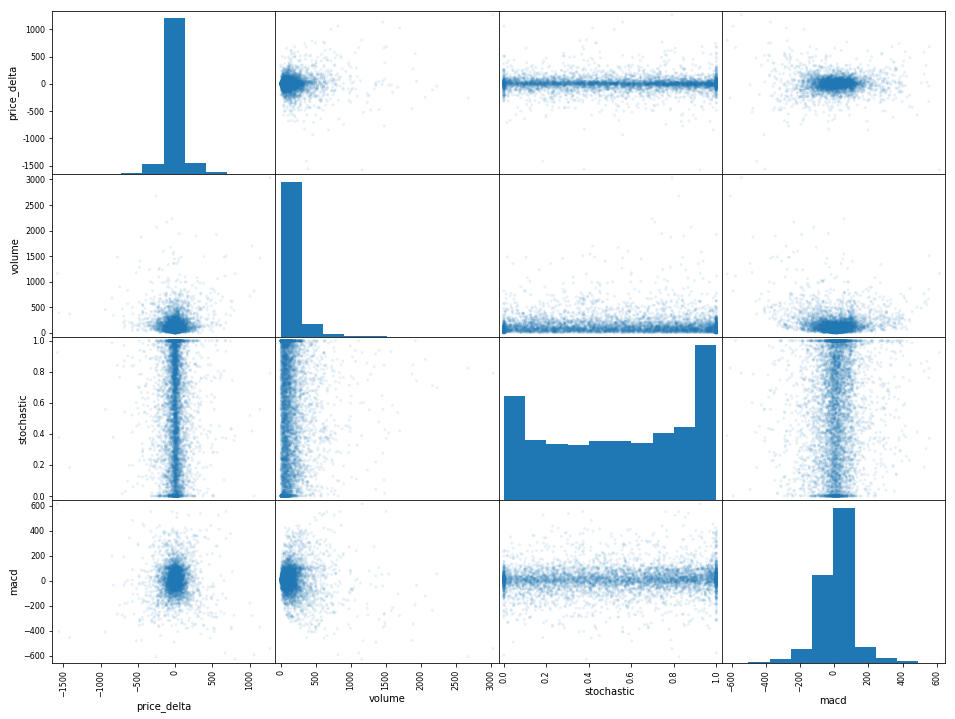

In [7]:
attributes = ['price_delta', 'volume', 'stochastic', 'macd']
scatter_matrix(df_primary[attributes], figsize=(16,12), alpha=0.1)
plt.show()

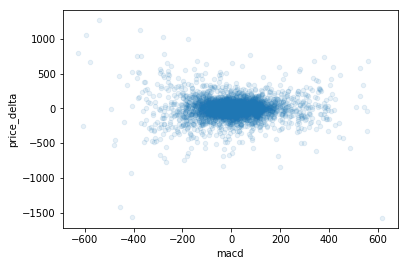

In [8]:
df_primary.plot(kind='scatter', x='macd', y='price_delta', alpha=0.1)
plt.show()

<a id='bokeh'></a>
## 2. Plotting with Bokeh

In [9]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file
output_notebook()

Loading BokehJS ...

In [10]:
df = get_data()
p = figure(plot_width=800, plot_height=600, x_axis_type="datetime")

p.circle(df['date'], df['closing_price'].values, color='navy', fill_color='white', alpha=0.5)
p.line(df['date'], df['closing_price'].values, color='navy', alpha=0.5)
p.line(df['date'], df['bdb_low'].values, color='green', alpha=0.5)
p.line(df['date'], df['bdb_high'].values, color='red', alpha=0.5)

show(p)